In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

# installing auto arima
# pip install --user pmdarima

# installing fbprophet
# pip install --user fbprophet
# !pip install --upgrade plotly

In [3]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [4]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

In [5]:
# Loading the data
df = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Predicting Sales\\GDP database.csv', sep='\t', encoding='latin-1', index_col=False)

# I've already done the passage below, so i let this just to knowledge
#df.columns = ["demo_ind","indicator","location","country","time","value","flag codes","flags"]

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(270038, 9)


,Unnamed: 0,demo_ind,indicator,location,country,time,value,flag codes,flags
0,0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1970,2.86,NaN,NaN
1,1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1971,2.96,NaN,NaN
2,2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1972,2.74,NaN,NaN
3,3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1973,2.49,NaN,NaN
4,4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,1974,2.40,NaN,NaN


In [6]:
df.isnull().sum()

Unnamed: 0         0
demo_ind           0
indicator          0
location           0
country            0
time               0
value           2066
flag codes    267972
flags         267972
dtype: int64

In [7]:
df['indicator'][df['value'].isnull()].unique()

array(['Population growth (annual %)',
       'Rural population (% of total population)',
       'GDP deflator (base year varies by country)',
       'GDP growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (PPP) (% of population)',
       'PPP conversion factor, GDP (LCU per international $)',
       'Total debt service (% of GNI)', 'GNI per capita (current LCU)',
       'Official exchange rate (LCU per US$, period average)',
       'GDP per capita (current LCU)',
       'PPP conversion factor, private consumption (LCU per international $)',
       'DEC alternative conversion factor (LCU per US$)'], dtype=object)

In [8]:
# Deleting the NULL values
df = df.dropna(subset = ['value'])

# filtering out the last 2 columns
df = df[['demo_ind','indicator','location','country','time','value']]

# Checking for null values
df.isnull().sum()

demo_ind     0
indicator    0
location     0
country      0
time         0
value        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267972 entries, 0 to 270037
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   demo_ind   267972 non-null  object 
 1   indicator  267972 non-null  object 
 2   location   267972 non-null  object 
 3   country    267972 non-null  object 
 4   time       267972 non-null  int64  
 5   value      267972 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.3+ MB


In [10]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values <= 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature demo_ind :35
The number of values for feature indicator :35
The number of values for feature location :233
The number of values for feature country :233
The number of values for feature time :50
The number of values for feature value :125438


In [11]:
# Filtering out the data we need - GDP per Capita
forecast_data = df[df['indicator'] == 'GDP per capita, PPP (current international $)']

forecast_data = forecast_data[~forecast_data['country'].isin(['Djibouti', 'South Sudan', 'Curaþao', 'Eritrea', 'Bermuda', 'Venezuela (Bolivarian Republic of)'])]

forecast_data.head(100)

,demo_ind,indicator,location,country,time,value
76848,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1990,17333.10
76849,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1991,17793.60
76850,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1992,18189.34
76851,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1993,19130.89
76852,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",AUS,Australia,1994,20063.81
...,...,...,...,...,...,...
76943,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",CAN,Canada,2001,30048.57
76944,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",CAN,Canada,2002,30851.31
76945,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",CAN,Canada,2003,32192.47
76946,NY_GDP_PCAP_PP_CD,"GDP per capita, PPP (current international $)",CAN,Canada,2004,33739.57


In [12]:
# Limiting the columns we need
forecast_data = forecast_data[['country','time','value']]
forecast_data.head()

,country,time,value
76848,Australia,1990,17333.10
76849,Australia,1991,17793.60
76850,Australia,1992,18189.34
76851,Australia,1993,19130.89
76852,Australia,1994,20063.81


In [13]:
# Changing the time to date - Most Time Series Models require date structure
forecast_data['time'] = forecast_data['time'].astype(str) + '-01-01'
forecast_data['time'] = pd.to_datetime(forecast_data['time'])

forecast_data.head()

,country,time,value
76848,Australia,1990-01-01,17333.10
76849,Australia,1991-01-01,17793.60
76850,Australia,1992-01-01,18189.34
76851,Australia,1993-01-01,19130.89
76852,Australia,1994-01-01,20063.81


In [14]:
forecast_data['time'].dt.tz_localize(None)

76848    1990-01-01
76849    1991-01-01
76850    1992-01-01
76851    1993-01-01
76852    1994-01-01
            ...    
267165   2014-01-01
267166   2015-01-01
267167   2016-01-01
267168   2017-01-01
267169   2011-01-01
Name: time, Length: 5100, dtype: datetime64[ns]

In [15]:
X_train = forecast_data[forecast_data['time'] < '2012-01-01']
X_valid = forecast_data[forecast_data['time'] >= '2011-01-01']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train['time'].unique()

X_train Shape (3967, 3)
X_Valid Shape (1323, 3)


array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [16]:
########################################################################################################
####################################### Running ARIMA on Australia #####################################
########################################################################################################

# filtering the train data
au = X_train[X_train['country'] == 'Australia']
au2 = au[['time', 'value']]

#filtering the valid data
au_v = X_valid[X_valid['country'] == 'Australia']
au_v2 = au_v[['time', 'value']]

# set the date into index
au2.set_index('time', inplace=True)
au_v2.set_index('time', inplace=True)

# Setting the Index for 6 years
index_7_years = pd.date_range(au2.index[-1], freq='AS', periods = 7) 

index_7_years

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [17]:
len(X_train['country'].unique())

190

The MSE of ARIMA is: 1838.1745414783798


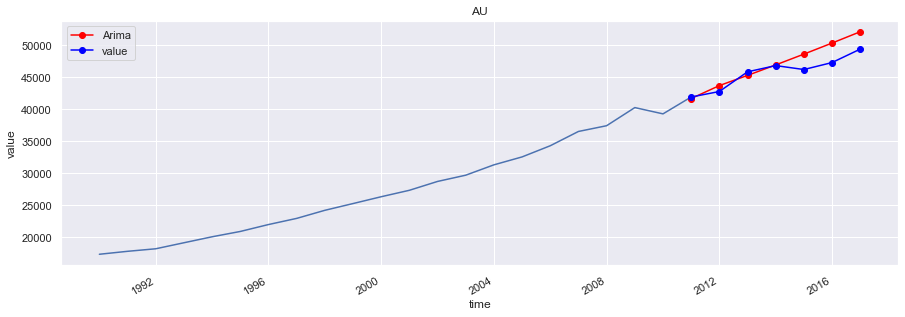

In [18]:
# Running ARIMA with random numbers
model_arima = ARIMA(au2, order=(0,2,3)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(7)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_7_years)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='time', y='value', data = au)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
au_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(au_v['value'].values, fcast1.values, squared=False))

In [19]:
###### Option 1: Finding the best value for ARIMA

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(au2,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

(0, 0, 0) 460.0842007079433
(0, 0, 1) 439.3169381091649
(0, 0, 2) 424.2923885413445
(0, 1, 0) 343.29855716475754
(0, 1, 1) 342.1347269787415
(0, 1, 2) 334.7675360660939
(0, 1, 3) 334.1124514781314
(0, 1, 4) 331.38405226591277
(0, 2, 0) 348.12476526480964
(0, 2, 1) 329.9389576566513
(0, 2, 2) 327.92437567794383
(0, 2, 3) 322.2395887098804
(0, 2, 4) nan
(1, 0, 0) 391.5859769520272
(1, 1, 0) 338.74124228660344
(1, 1, 2) 329.21732085636785
(1, 2, 0) 352.5900843899617
(2, 0, 0) 386.74747079459667
(3, 0, 0) 378.43737195516746
(4, 2, 0) 356.571333874243


The RMSE of auto-arima is: 3484.967708303944


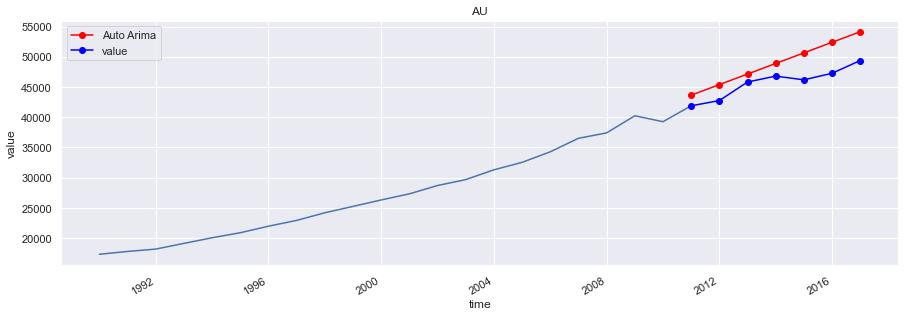

In [20]:
###### Option 2: Auto ARIMA

# Running auto ARIMA 
auto_arima_model = pm.auto_arima(au2, seasonal=False, m=7)

# Read more about setting m
# https://alkaline-ml.com/pmdarima/tips_and_tricks.html

# make your forecasts
fcast2 = auto_arima_model.predict(7) 
fcast2 = pd.Series(fcast2, index=index_7_years)
fcast2 = fcast2.rename("Auto Arima")

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='time', y='value', data = au)
chart.set_title('AU')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
au_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The RMSE of auto-arima is:', mean_squared_error(au_v['value'].values, fcast2.values, squared=False))

**PROPHET**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


The MSE of prophet is: 1189.1321760930045


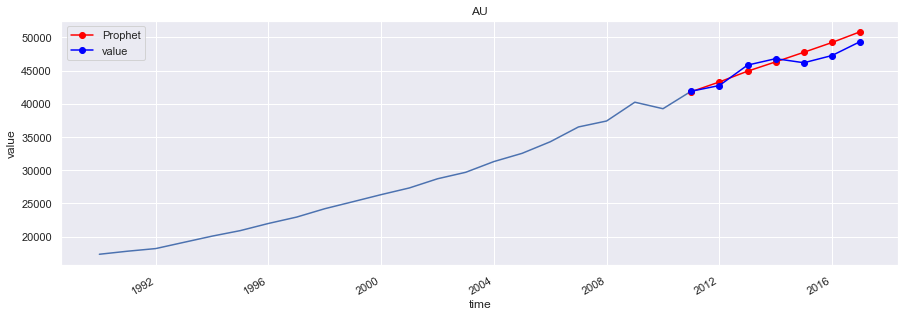

In [21]:
# prepare expected column names
au3 = au.copy()
au3 = au3[['time', 'value']]
au3.columns = ['ds', 'y']
au3['ds']= to_datetime(au3['ds'])

# define the model
model = Prophet()
# fit the model
model.fit(au3)

# define the period for which we want a prediction
df_index_7_years = pd.DataFrame(index_7_years)
df_index_7_years.columns = ['ds']
df_index_7_years['ds']= to_datetime(df_index_7_years['ds'])

# use the model to make a forecast
fcast3 = model.predict(df_index_7_years)
fcast3 = pd.Series(fcast3['yhat'].values, index=index_7_years)
fcast3 = fcast3.rename("Prophet")

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='time', y='value', data = au)
chart.set_title('AU')
fcast3.plot(ax=ax, color='red', marker="o", legend=True)
au_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of prophet is:', mean_squared_error(au_v['value'].values, fcast3.values, squared=False))

In [22]:
model.predict(df_index_7_years)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,27482.299828,41268.619808,42372.017580,27482.299828,27482.299828,14333.925422,14333.925422,14333.925422,14333.925422,14333.925422,14333.925422,0.0,0.0,0.0,41816.225250
1,2012-01-01,28967.967552,42734.001105,43830.036229,28943.979611,28988.633132,14321.574871,14321.574871,14321.574871,14321.574871,14321.574871,14321.574871,0.0,0.0,0.0,43289.542424
2,2013-01-01,30457.705599,44358.974682,45499.427681,30370.687706,30537.309170,14454.949030,14454.949030,14454.949030,14454.949030,14454.949030,14454.949030,0.0,0.0,0.0,44912.654630
3,2014-01-01,31943.373324,45747.866189,46917.913613,31768.704521,32116.395182,14378.270869,14378.270869,14378.270869,14378.270869,14378.270869,14378.270869,0.0,0.0,0.0,46321.644193
4,2015-01-01,33429.041048,47148.444147,48386.456078,33166.989469,33710.537037,14333.925422,14333.925422,14333.925422,14333.925422,14333.925422,14333.925422,0.0,0.0,0.0,47762.966471
5,2016-01-01,34914.708773,48564.940565,49978.714462,34544.462165,35311.925424,14321.574871,14321.574871,14321.574871,14321.574871,14321.574871,14321.574871,0.0,0.0,0.0,49236.283644
6,2017-01-01,36404.446820,50058.287111,51653.301742,35910.969351,36936.560729,14454.949030,14454.949030,14454.949030,14454.949030,14454.949030,14454.949030,0.0,0.0,0.0,50859.395850


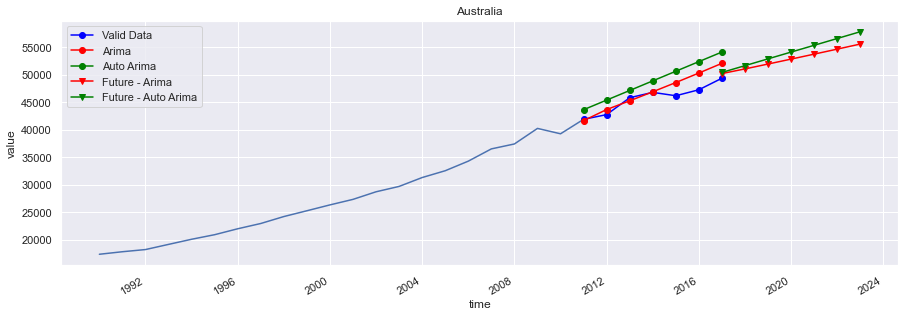

In [23]:
# Step 1 - Arima & Auto-Arima

# creating a country list
countries = forecast_data['country'].unique()

countries = ['Australia']

for c in countries:
    # filtering the train data
    train_data = X_train[X_train['country'] == c] # 3 columns
    train_data2 = train_data[['time', 'value']] # 2 columns
    
    # filtering the valid data
    valid_data = X_valid[X_valid['country'] == c]
    valid_data2 = valid_data[['time', 'value']]
    
    # all data
    all_data = forecast_data[forecast_data['country']==c]
    all_data2 = all_data[['time', 'value']]
    
    #convert date column to datetime
    train_data2.set_index('time', inplace=True)
    valid_data2.set_index('time', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('time', inplace=True)
    

    # Setting the Valid - Index for 7 years
    index_7_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 7) 
    
    # Setting the Future - Index for 7 years
    future_index_7_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 7) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        #del t_fcast3
        
        del f_fcast1
        del f_fcast2
        #del f_fcast3       
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(4,1,1))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=7)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(7) 
        t_fcast2 = pd.Series(t_fcast2, index=index_7_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=7)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(7) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_7_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Future Error")  
        
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("")

In [24]:
future_index_7_years

DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


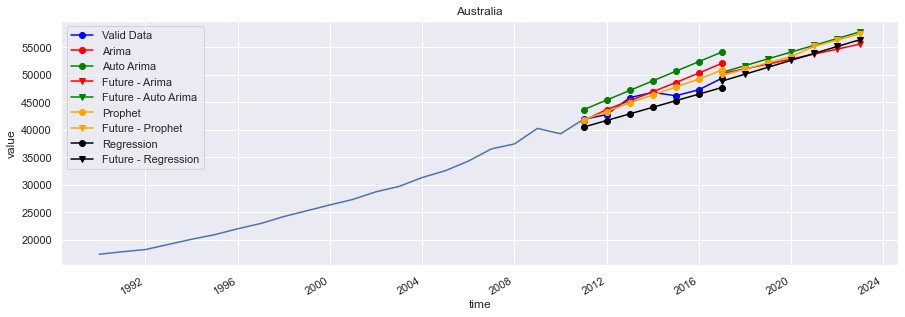

In [25]:
# Step 2 - Adding Prophet and Regression

# creating a country list
countries = forecast_data['country'].unique()

countries = ['Australia']

for c in countries:
    # filtering the train data
    train_data = X_train[X_train['country'] == c]
    train_data2 = train_data[['time', 'value']]
    
    # filtering the valid data
    valid_data = X_valid[X_valid['country'] == c]
    valid_data2 = valid_data[['time', 'value']]
    
    # all data
    all_data = forecast_data[forecast_data['country']==c]
    all_data2 = all_data[['time', 'value']]
    
    #convert date column to datetime
    train_data2.set_index('time', inplace=True)
    valid_data2.set_index('time', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('time', inplace=True)
    

    # Setting the Valid - Index for 7 years
    index_7_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 7) 
    
    # Setting the Future - Index for 7 years
    future_index_7_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 7) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        del t_fcast3
        del t_fcast4
        
        del f_fcast1
        del f_fcast2
        del f_fcast3       
        del f_fcast4
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=7)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(7) 
        t_fcast2 = pd.Series(t_fcast2, index=index_7_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=7)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(7) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_7_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Train Error")  

    ##############################################################################################################
    ######################################      PROPHET             ############################################## 
    ##############################################################################################################
    
    # prepare expected column names
    train_data3 = train_data.copy()
    train_data3 = train_data3[['time', 'value']]
    train_data3.columns = ['ds', 'y']
    train_data3['ds']= to_datetime(train_data3['ds'])
    
    all_data3 = all_data.copy()
    all_data3 = all_data3[['time', 'value']]
    all_data3.columns = ['ds', 'y']
    all_data3['ds']= to_datetime(all_data3['ds'])

    # define the period for which we want a prediction - Valid
    v_df_index_7_years = pd.DataFrame(index_7_years)
    v_df_index_7_years.columns = ['ds']
    v_df_index_7_years['ds']= to_datetime(v_df_index_7_years['ds'])

    # define the period for which we want a prediction - Future
    f_df_index_7_years = pd.DataFrame(future_index_7_years)
    f_df_index_7_years.columns = ['ds']
    f_df_index_7_years['ds']= to_datetime(f_df_index_7_years['ds'])
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model = Prophet()
    # fit the model
    model.fit(train_data3)

    # use the model to make a forecast
    t_fcast3 = model.predict(v_df_index_7_years)
    t_fcast3 = pd.Series(t_fcast3['yhat'].values, index=index_7_years)
    t_fcast3 = t_fcast3.rename("Prophet")
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model2 = Prophet()
    # fit the model
    model2.fit(all_data3)

    # use the model to make a forecast
    f_fcast3 = model2.predict(f_df_index_7_years)
    f_fcast3 = pd.Series(f_fcast3['yhat'].values, index=future_index_7_years)
    f_fcast3 = f_fcast3.rename("Future - Prophet")  

    ##############################################################################################################
    ########################################         Regression         ##########################################
    ##############################################################################################################
    
    # Creating Ordinal Dates
    train_data['MonthNumberOrdinal'] = train_data['time']
    train_data['MonthNumberOrdinal'] = pd.to_datetime(train_data['MonthNumberOrdinal']).map(datetime.toordinal)

    all_data['MonthNumberOrdinal'] = all_data['time']
    all_data['MonthNumberOrdinal'] = pd.to_datetime(all_data['MonthNumberOrdinal']).map(datetime.toordinal)

    # adding the ordinal dates to the prediction dates
    v_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(v_df_index_7_years['ds']).map(datetime.toordinal)
    f_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(f_df_index_7_years['ds']).map(datetime.toordinal)


    # Fitting LR on Valid
    reg = linear_model.LinearRegression()
    reg.fit(train_data['MonthNumberOrdinal'].values.reshape(-1, 1), train_data['value'].values)

    # Making predictions
    t_fcast4 = reg.predict(v_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    t_fcast4 = pd.Series(t_fcast4, index=index_7_years)
    t_fcast4 = t_fcast4.rename("Regression")

    # Fitting LR on Future
    reg2 = linear_model.LinearRegression()
    reg2.fit(all_data['MonthNumberOrdinal'].values.reshape(-1, 1), all_data['value'].values)

    # Making predictions
    f_fcast4 = reg2.predict(f_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    f_fcast4 = pd.Series(f_fcast4, index=future_index_7_years)
    f_fcast4 = f_fcast4.rename("Future - Regression")
    
    ##############################################################################################################
    ########################################      SAVING THE MSE        ##########################################
    ##############################################################################################################
    
    t_fcast1_mse = mean_squared_error(valid_data['value'].values, t_fcast1.values, squared=False)
    t_fcast2_mse = mean_squared_error(valid_data['value'].values, t_fcast2.values, squared=False)
    t_fcast3_mse = mean_squared_error(valid_data['value'].values, t_fcast3.values, squared=False)
    t_fcast4_mse = mean_squared_error(valid_data['value'].values, t_fcast4.values, squared=False)
    
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("") 
    
    t_fcast3.plot(ax=ax, color='orange', marker="o", legend=True)
    f_fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
    
    t_fcast4.plot(ax=ax, color='black', marker="o", legend=True)
    f_fcast4.plot(ax=ax, color='black', marker="v", legend=True)

In [26]:
v_df_index_7_years

,ds,ForecastDate_Ordinal
0,2011-01-01,734138
1,2012-01-01,734503
2,2013-01-01,734869
3,2014-01-01,735234
4,2015-01-01,735599
5,2016-01-01,735964
6,2017-01-01,736330


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


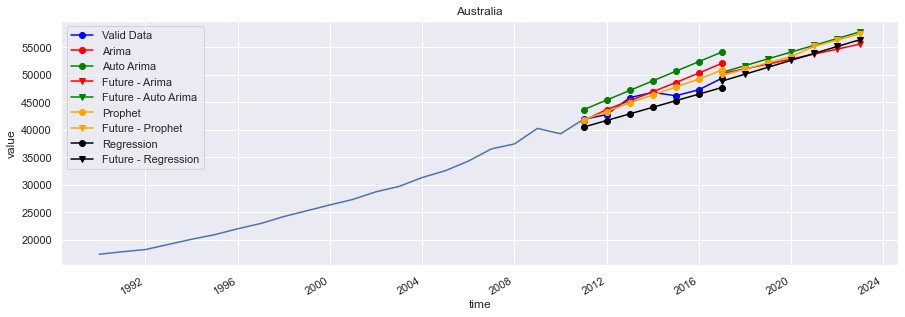

In [27]:
# Step 3 - Saving the results

# creating a country list
countries = forecast_data['country'].unique()

countries = ['Australia']

for c in countries:
    # filtering the train data
    train_data = X_train[X_train['country'] == c]
    train_data2 = train_data[['time', 'value']]
    
    # filtering the valid data
    valid_data = X_valid[X_valid['country'] == c]
    valid_data2 = valid_data[['time', 'value']]
    
    # all data
    all_data = forecast_data[forecast_data['country']==c]
    all_data2 = all_data[['time', 'value']]
    
    #convert date column to datetime
    train_data2.set_index('time', inplace=True)
    valid_data2.set_index('time', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('time', inplace=True)
    

    # Setting the Valid - Index for 6 years
    index_7_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 7) 
    
    # Setting the Future - Index for 6 years
    future_index_7_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 7) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        del t_fcast3
        del t_fcast4
        
        del f_fcast1
        del f_fcast2
        del f_fcast3 
        del f_fcast4
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
        del df_fcast4
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=7)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(7) 
        t_fcast2 = pd.Series(t_fcast2, index=index_7_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=7)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(7) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_7_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Train Error")  

    ##############################################################################################################
    ######################################      PROPHET             ############################################## 
    ##############################################################################################################
    
    # prepare expected column names
    train_data3 = train_data.copy()
    train_data3 = train_data3[['time', 'value']]
    train_data3.columns = ['ds', 'y']
    train_data3['ds']= to_datetime(train_data3['ds'])
    
    all_data3 = all_data.copy()
    all_data3 = all_data3[['time', 'value']]
    all_data3.columns = ['ds', 'y']
    all_data3['ds']= to_datetime(all_data3['ds'])

    # define the period for which we want a prediction - Valid
    v_df_index_7_years = pd.DataFrame(index_7_years)
    v_df_index_7_years.columns = ['ds']
    v_df_index_7_years['ds']= to_datetime(v_df_index_7_years['ds'])

    # define the period for which we want a prediction - Future
    f_df_index_7_years = pd.DataFrame(future_index_7_years)
    f_df_index_7_years.columns = ['ds']
    f_df_index_7_years['ds']= to_datetime(f_df_index_7_years['ds'])
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model = Prophet()
    # fit the model
    model.fit(train_data3)

    # use the model to make a forecast
    t_fcast3 = model.predict(v_df_index_7_years)
    t_fcast3 = pd.Series(t_fcast3['yhat'].values, index=index_7_years)
    t_fcast3 = t_fcast3.rename("Prophet")
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model2 = Prophet()
    # fit the model
    model2.fit(all_data3)

    # use the model to make a forecast
    f_fcast3 = model2.predict(f_df_index_7_years)
    f_fcast3 = pd.Series(f_fcast3['yhat'].values, index=future_index_7_years)
    f_fcast3 = f_fcast3.rename("Future - Prophet")  

    ##############################################################################################################
    ########################################         Regression         ##########################################
    ##############################################################################################################
    
    # Creating Ordinal Dates
    train_data['MonthNumberOrdinal'] = train_data['time']
    train_data['MonthNumberOrdinal'] = pd.to_datetime(train_data['MonthNumberOrdinal']).map(datetime.toordinal)

    all_data['MonthNumberOrdinal'] = all_data['time']
    all_data['MonthNumberOrdinal'] = pd.to_datetime(all_data['MonthNumberOrdinal']).map(datetime.toordinal)

    # adding the ordinal dates to the prediction dates
    v_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(v_df_index_7_years['ds']).map(datetime.toordinal)
    f_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(f_df_index_7_years['ds']).map(datetime.toordinal)


    # Fitting LR on Valid
    reg = linear_model.LinearRegression()
    reg.fit(train_data['MonthNumberOrdinal'].values.reshape(-1, 1), train_data['value'].values)

    # Making predictions
    t_fcast4 = reg.predict(v_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    t_fcast4 = pd.Series(t_fcast4, index=index_7_years)
    t_fcast4 = t_fcast4.rename("Regression")

    # Fitting LR on Future
    reg2 = linear_model.LinearRegression()
    reg2.fit(all_data['MonthNumberOrdinal'].values.reshape(-1, 1), all_data['value'].values)

    # Making predictions
    f_fcast4 = reg2.predict(f_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    f_fcast4 = pd.Series(f_fcast4, index=future_index_7_years)
    f_fcast4 = f_fcast4.rename("Future - Regression")
    
    ##############################################################################################################
    ########################################      SAVING THE MSE        ##########################################
    ##############################################################################################################
    
    t_fcast1_mse = mean_squared_error(valid_data['value'].values, t_fcast1.values, squared=False)
    t_fcast2_mse = mean_squared_error(valid_data['value'].values, t_fcast2.values, squared=False)
    t_fcast3_mse = mean_squared_error(valid_data['value'].values, t_fcast3.values, squared=False)
    t_fcast4_mse = mean_squared_error(valid_data['value'].values, t_fcast4.values, squared=False)
    
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("") 
    
    t_fcast3.plot(ax=ax, color='orange', marker="o", legend=True)
    f_fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
    
    t_fcast4.plot(ax=ax, color='black', marker="o", legend=True)
    f_fcast4.plot(ax=ax, color='black', marker="v", legend=True)  
        
    ##############################################################################################################
    ########################################      SAVING THE RESULTS     #########################################
    ##############################################################################################################
    
    try:
        # Creating a DF for fcast1
        t_fcast1 = t_fcast1.reset_index()
        t_fcast1.columns = ['Date','Arima ForecastValue Validation']

        f_fcast1 = f_fcast1.reset_index()
        f_fcast1.columns = ['Date','Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast1['Arima ForecastValue Future'] = np.nan
        f_fcast1['Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast1 = t_fcast1[['Date','Arima ForecastValue Future','Arima ForecastValue Validation']]

        # Joining them together
        df_fcast1 = pd.concat([t_fcast1, f_fcast1], axis=0)
        df_fcast1['Country'] = c
        df_fcast1['ML Method'] = 'Arima'
        df_fcast1['Arima MSE'] = t_fcast1_mse
    
    except:
        df_fcast1 = pd.DataFrame({'Date': [np.nan], 'Arima ForecastValue Future': [np.nan],'Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Arima'], 'Arima MSE':[np.nan]})

    try:
        # Creating a DF for fcast2
        t_fcast2 = t_fcast2.reset_index()
        t_fcast2.columns = ['Date','Auto-Arima ForecastValue Validation']

        f_fcast2 = f_fcast2.reset_index()
        f_fcast2.columns = ['Date','Auto-Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast2['Auto-Arima ForecastValue Future'] = np.nan
        f_fcast2['Auto-Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast2 = t_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation']]

        # Joining them together
        df_fcast2 = pd.concat([t_fcast2, f_fcast2], axis=0)
        df_fcast2['Country'] = c
        df_fcast2['ML Method'] = 'Auto-Arima'
        df_fcast2['Auto-Arima MSE'] = t_fcast2_mse
    
    except:
        df_fcast2 = pd.DataFrame({'Date': [np.nan], 'Auto-Arima ForecastValue Future': [np.nan],'Auto-Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima']})
        
    try:
        # Creating a DF for fcast3
        t_fcast3 = t_fcast3.reset_index()
        t_fcast3.columns = ['Date','Prophet ForecastValue Validation']

        f_fcast3 = f_fcast3.reset_index()
        f_fcast3.columns = ['Date','Prophet ForecastValue Future']

        # Creating the extra columns
        t_fcast3['Prophet ForecastValue Future'] = np.nan
        f_fcast3['Prophet ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast3 = t_fcast3[['Date','Prophet ForecastValue Future','Prophet ForecastValue Validation']]

        # Joining them together
        df_fcast3 = pd.concat([t_fcast3, f_fcast3], axis=0)
        df_fcast3['Country'] = c
        df_fcast3['ML Method'] = 'Prophet'
        df_fcast3['Prophet MSE'] = t_fcast3_mse
    
    except:
        df_fcast3 = pd.DataFrame({'Date': [np.nan], 'Prophet ForecastValue Future': [np.nan],'Prophet ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima']})
        
    try:
        # Creating a DF for fcast4
        t_fcast4 = t_fcast4.reset_index()
        t_fcast4.columns = ['Date','Regression ForecastValue Validation']

        f_fcast4 = f_fcast4.reset_index()
        f_fcast4.columns = ['Date','Regression ForecastValue Future']

        # Creating the extra columns
        t_fcast4['Regression ForecastValue Future'] = np.nan
        f_fcast4['Regression ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast4 = t_fcast4[['Date','Regression ForecastValue Future','Regression ForecastValue Validation']]

        # Joining them together
        df_fcast4 = pd.concat([t_fcast4, f_fcast4], axis=0)
        df_fcast4['Country'] = c
        df_fcast4['ML Method'] = 'Regression'
        df_fcast4['Regression MSE'] = t_fcast4_mse
        df_fcast4['Regression Slope'] = reg2.coef_[0]
        df_fcast4['Regression Trend Direction'] = np.where(df_fcast4['Regression Slope']<=0, 'Negative Trend', 'Positive Trend')
        df_fcast4['Regression Slope Monthly Change Proj'] = df_fcast4['Regression ForecastValue Future'].iloc[-1] - df_fcast4['Regression ForecastValue Future'].iloc[-2]
    
    except:
        df_fcast4 = pd.DataFrame({'Date': [np.nan], 'Regression ForecastValue Future': [np.nan],'Regression ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima'], 'Regression Slope':[np.nan], 'Regression Trend Direction':[np.nan], 'Regression Slope Monthly Change Proj':[np.nan]})
        
    # Aggregating the data to avoid duplication
    df_fcast1 = df_fcast1.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Arima ForecastValue Future':'sum','Arima ForecastValue Validation':'sum','Arima MSE':'max'})
    df_fcast2 = df_fcast2.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Auto-Arima ForecastValue Future':'sum','Auto-Arima ForecastValue Validation':'sum','Auto-Arima MSE':'max'})
    df_fcast3 = df_fcast3.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Prophet ForecastValue Future':'sum','Prophet ForecastValue Validation':'sum','Prophet MSE':'max'})
    df_fcast4 = df_fcast4.groupby(['Date', 'Country','ML Method', 'Regression Trend Direction'], as_index = False).agg({'Regression ForecastValue Future':'sum','Regression ForecastValue Validation':'sum','Regression MSE':'max','Regression Slope':'max','Regression Slope Monthly Change Proj':'max'})

    # joining them all together
    all_forecasts = df_fcast1.merge(df_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation', 'Auto-Arima MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast3[['Date','Prophet ForecastValue Future', 'Prophet ForecastValue Validation', 'Prophet MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast4[['Date','Regression ForecastValue Future', 'Regression ForecastValue Validation', 'Regression MSE', 'Regression Slope','Regression Slope Monthly Change Proj','Regression Trend Direction']], how = 'left', on ='Date')

    # Saving the predictions in a DF
    try:
        final_forecasts = pd.concat([final_forecasts, all_forecasts], ignore_index = True)
    except:
        final_forecasts = all_forecasts

In [28]:
all_forecasts

,Date,Country,ML Method,Arima ForecastValue Future,Arima ForecastValue Validation,Arima MSE,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE,Prophet ForecastValue Future,Prophet ForecastValue Validation,Prophet MSE,Regression ForecastValue Future,Regression ForecastValue Validation,Regression MSE,Regression Slope,Regression Slope Monthly Change Proj,Regression Trend Direction
0,2011-01-01,Australia,Arima,0.000000,41652.378417,1838.174541,0.000000,43644.353983,3484.967708,0.000000,41816.225250,1189.132176,0.000000,40479.487055,1833.553097,3.450056,1259.270378,Positive Trend
1,2012-01-01,Australia,Arima,0.000000,43674.360565,1838.174541,0.000000,45394.537967,3484.967708,0.000000,43289.542424,1189.132176,0.000000,41679.244284,1833.553097,3.450056,1259.270378,Positive Trend
2,2013-01-01,Australia,Arima,0.000000,45269.025861,1838.174541,0.000000,47144.721950,3484.967708,0.000000,44912.654630,1189.132176,0.000000,42882.288519,1833.553097,3.450056,1259.270378,Positive Trend
3,2014-01-01,Australia,Arima,0.000000,46907.979234,1838.174541,0.000000,48894.905933,3484.967708,0.000000,46321.644193,1189.132176,0.000000,44082.045747,1833.553097,3.450056,1259.270378,Positive Trend
4,2015-01-01,Australia,Arima,0.000000,48591.220686,1838.174541,0.000000,50645.089917,3484.967708,0.000000,47762.966471,1189.132176,0.000000,45281.802976,1833.553097,3.450056,1259.270378,Positive Trend
5,2016-01-01,Australia,Arima,0.000000,50318.750215,1838.174541,0.000000,52395.273900,3484.967708,0.000000,49236.283644,1189.132176,0.000000,46481.560205,1833.553097,3.450056,1259.270378,Positive Trend
6,2017-01-01,Australia,Arima,50228.065825,52090.567822,1838.174541,50431.032667,54145.457883,3484.967708,49867.090480,50859.395850,1189.132176,48850.286020,47684.604440,1833.553097,3.450056,1259.270378,Positive Trend
7,2018-01-01,Australia,Arima,51070.725719,0.000000,1838.174541,51665.762099,0.000000,3484.967708,51024.186471,0.000000,1189.132176,50109.556398,0.000000,1833.553097,3.450056,1259.270378,Positive Trend
8,2019-01-01,Australia,Arima,51958.616547,0.000000,1838.174541,52900.491532,0.000000,3484.967708,52174.736426,0.000000,1189.132176,51368.826775,0.000000,1833.553097,3.450056,1259.270378,Positive Trend
9,2020-01-01,Australia,Arima,52854.905339,0.000000,1838.174541,54135.220964,0.000000,3484.967708,53318.889886,0.000000,1189.132176,52628.097153,0.000000,1833.553097,3.450056,1259.270378,Positive Trend


In [29]:
df_fcast2

,Date,Country,ML Method,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE
0,2011-01-01,Australia,Auto-Arima,0.000000,43644.353983,3484.967708
1,2012-01-01,Australia,Auto-Arima,0.000000,45394.537967,3484.967708
2,2013-01-01,Australia,Auto-Arima,0.000000,47144.721950,3484.967708
3,2014-01-01,Australia,Auto-Arima,0.000000,48894.905933,3484.967708
4,2015-01-01,Australia,Auto-Arima,0.000000,50645.089917,3484.967708
5,2016-01-01,Australia,Auto-Arima,0.000000,52395.273900,3484.967708
6,2017-01-01,Australia,Auto-Arima,50431.032667,54145.457883,3484.967708
7,2018-01-01,Australia,Auto-Arima,51665.762099,0.000000,3484.967708
8,2019-01-01,Australia,Auto-Arima,52900.491532,0.000000,3484.967708
9,2020-01-01,Australia,Auto-Arima,54135.220964,0.000000,3484.967708


In [30]:
df_fcast1.merge(df_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation', 'Auto-Arima MSE']], how = 'left', on ='Date')

,Date,Country,ML Method,Arima ForecastValue Future,Arima ForecastValue Validation,Arima MSE,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE
0,2011-01-01,Australia,Arima,0.000000,41652.378417,1838.174541,0.000000,43644.353983,3484.967708
1,2012-01-01,Australia,Arima,0.000000,43674.360565,1838.174541,0.000000,45394.537967,3484.967708
2,2013-01-01,Australia,Arima,0.000000,45269.025861,1838.174541,0.000000,47144.721950,3484.967708
3,2014-01-01,Australia,Arima,0.000000,46907.979234,1838.174541,0.000000,48894.905933,3484.967708
4,2015-01-01,Australia,Arima,0.000000,48591.220686,1838.174541,0.000000,50645.089917,3484.967708
5,2016-01-01,Australia,Arima,0.000000,50318.750215,1838.174541,0.000000,52395.273900,3484.967708
6,2017-01-01,Australia,Arima,50228.065825,52090.567822,1838.174541,50431.032667,54145.457883,3484.967708
7,2018-01-01,Australia,Arima,51070.725719,0.000000,1838.174541,51665.762099,0.000000,3484.967708
8,2019-01-01,Australia,Arima,51958.616547,0.000000,1838.174541,52900.491532,0.000000,3484.967708
9,2020-01-01,Australia,Arima,52854.905339,0.000000,1838.174541,54135.220964,0.000000,3484.967708


Australia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


Austria


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


Belgium


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


Canada


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


Czechia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


Denmark


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

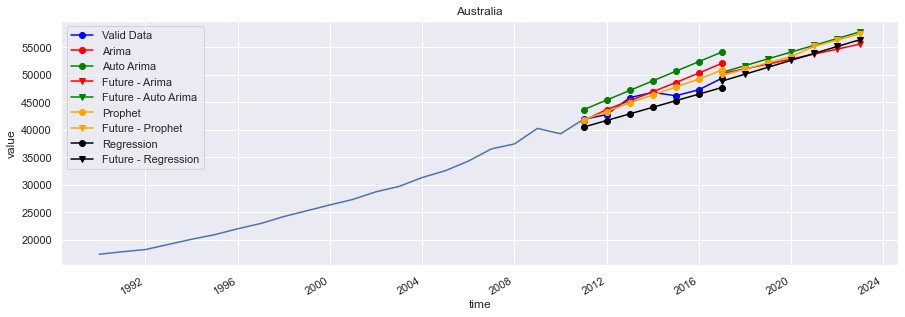

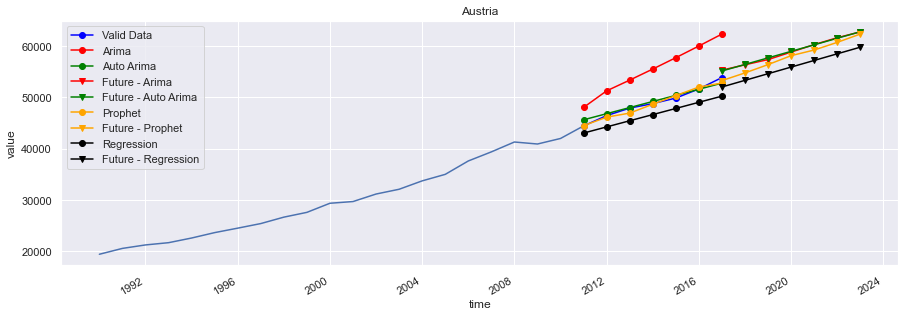

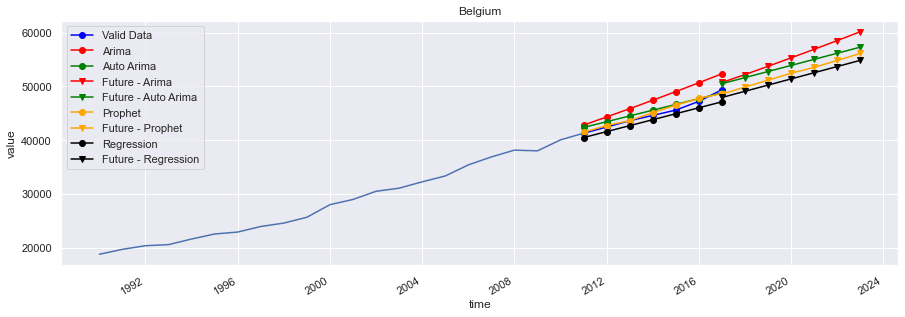

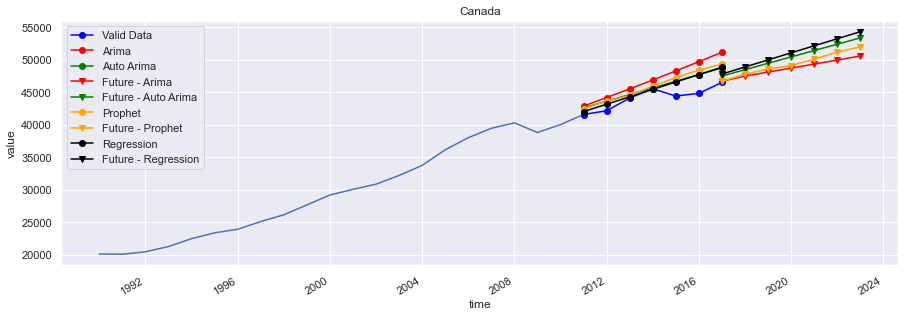

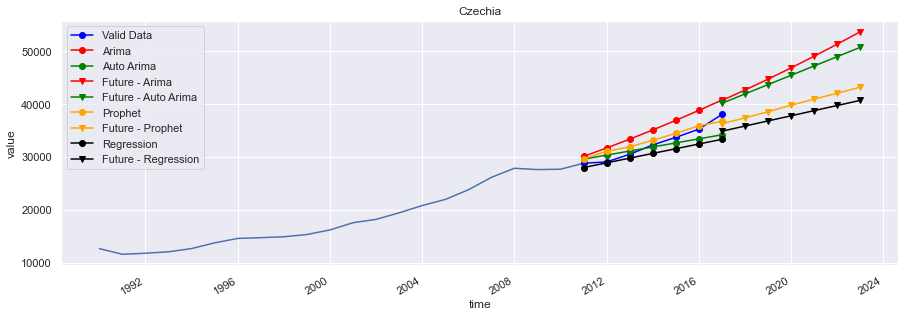

In [31]:
# Step 5 - Testing it on all countries

# creating a country list
countries = forecast_data['country'].unique()

# Denmark gives an error
#countries = ['Denmark']

for c in countries:
    # filtering the train data
    print(c)
    train_data = X_train[X_train['country'] == c]
    train_data2 = train_data[['time', 'value']]
    
    # filtering the valid data
    valid_data = X_valid[X_valid['country'] == c]
    valid_data2 = valid_data[['time', 'value']]
    
    # all data
    all_data = forecast_data[forecast_data['country']==c]
    all_data2 = all_data[['time', 'value']]
    
    #convert date column to datetime
    train_data2.set_index('time', inplace=True)
    valid_data2.set_index('time', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('time', inplace=True)
    

    # Setting the Valid - Index for 6 years
    index_7_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 7) 
    
    # Setting the Future - Index for 6 years
    future_index_7_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 7) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        del t_fcast3
        del t_fcast4
        
        del f_fcast1
        del f_fcast2
        del f_fcast3 
        del f_fcast4
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
        del df_fcast4
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=7)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(7) 
        t_fcast2 = pd.Series(t_fcast2, index=index_7_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=7)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(7) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_7_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Train Error")  

    ##############################################################################################################
    ######################################      PROPHET             ############################################## 
    ##############################################################################################################
    
    # prepare expected column names
    train_data3 = train_data.copy()
    train_data3 = train_data3[['time', 'value']]
    train_data3.columns = ['ds', 'y']
    train_data3['ds']= to_datetime(train_data3['ds'])
    
    all_data3 = all_data.copy()
    all_data3 = all_data3[['time', 'value']]
    all_data3.columns = ['ds', 'y']
    all_data3['ds']= to_datetime(all_data3['ds'])

    # define the period for which we want a prediction - Valid
    v_df_index_7_years = pd.DataFrame(index_7_years)
    v_df_index_7_years.columns = ['ds']
    v_df_index_7_years['ds']= to_datetime(v_df_index_7_years['ds'])

    # define the period for which we want a prediction - Future
    f_df_index_7_years = pd.DataFrame(future_index_7_years)
    f_df_index_7_years.columns = ['ds']
    f_df_index_7_years['ds']= to_datetime(f_df_index_7_years['ds'])
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model = Prophet()
    # fit the model
    model.fit(train_data3)

    # use the model to make a forecast
    t_fcast3 = model.predict(v_df_index_7_years)
    t_fcast3 = pd.Series(t_fcast3['yhat'].values, index=index_7_years)
    t_fcast3 = t_fcast3.rename("Prophet")
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model2 = Prophet()
    # fit the model
    model2.fit(all_data3)

    # use the model to make a forecast
    f_fcast3 = model2.predict(f_df_index_7_years)
    f_fcast3 = pd.Series(f_fcast3['yhat'].values, index=future_index_7_years)
    f_fcast3 = f_fcast3.rename("Future - Prophet")  

    ##############################################################################################################
    ########################################         Regression         ##########################################
    ##############################################################################################################
    
    # Creating Ordinal Dates
    train_data['MonthNumberOrdinal'] = train_data['time']
    train_data['MonthNumberOrdinal'] = pd.to_datetime(train_data['MonthNumberOrdinal']).map(datetime.toordinal)

    all_data['MonthNumberOrdinal'] = all_data['time']
    all_data['MonthNumberOrdinal'] = pd.to_datetime(all_data['MonthNumberOrdinal']).map(datetime.toordinal)

    # adding the ordinal dates to the prediction dates
    v_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(v_df_index_7_years['ds']).map(datetime.toordinal)
    f_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(f_df_index_7_years['ds']).map(datetime.toordinal)


    # Fitting LR on Valid
    reg = linear_model.LinearRegression()
    reg.fit(train_data['MonthNumberOrdinal'].values.reshape(-1, 1), train_data['value'].values)

    # Making predictions
    t_fcast4 = reg.predict(v_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    t_fcast4 = pd.Series(t_fcast4, index=index_7_years)
    t_fcast4 = t_fcast4.rename("Regression")

    # Fitting LR on Future
    reg2 = linear_model.LinearRegression()
    reg2.fit(all_data['MonthNumberOrdinal'].values.reshape(-1, 1), all_data['value'].values)

    # Making predictions
    f_fcast4 = reg2.predict(f_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    f_fcast4 = pd.Series(f_fcast4, index=future_index_7_years)
    f_fcast4 = f_fcast4.rename("Future - Regression")
    
    ##############################################################################################################
    ########################################      SAVING THE MSE        ##########################################
    ##############################################################################################################
    
    t_fcast1_mse = mean_squared_error(valid_data['value'].values, t_fcast1.values, squared=False)
    t_fcast2_mse = mean_squared_error(valid_data['value'].values, t_fcast2.values, squared=False)
    t_fcast3_mse = mean_squared_error(valid_data['value'].values, t_fcast3.values, squared=False)
    t_fcast4_mse = mean_squared_error(valid_data['value'].values, t_fcast4.values, squared=False)
    
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("") 
    
    t_fcast3.plot(ax=ax, color='orange', marker="o", legend=True)
    f_fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
    
    t_fcast4.plot(ax=ax, color='black', marker="o", legend=True)
    f_fcast4.plot(ax=ax, color='black', marker="v", legend=True)  
        
    ##############################################################################################################
    ########################################      SAVING THE RESULTS     #########################################
    ##############################################################################################################
    
    try:
        # Creating a DF for fcast1
        t_fcast1 = t_fcast1.reset_index()
        t_fcast1.columns = ['Date','Arima ForecastValue Validation']

        f_fcast1 = f_fcast1.reset_index()
        f_fcast1.columns = ['Date','Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast1['Arima ForecastValue Future'] = np.nan
        f_fcast1['Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast1 = t_fcast1[['Date','Arima ForecastValue Future','Arima ForecastValue Validation']]

        # Joining them together
        df_fcast1 = pd.concat([t_fcast1, f_fcast1], axis=0)
        df_fcast1['Country'] = c
        df_fcast1['ML Method'] = 'Arima'
        df_fcast1['Arima MSE'] = t_fcast1_mse
    
    except:
        df_fcast1 = pd.DataFrame({'Date': [np.nan], 'Arima ForecastValue Future': [np.nan],'Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Arima']})

    try:
        # Creating a DF for fcast2
        t_fcast2 = t_fcast2.reset_index()
        t_fcast2.columns = ['Date','Auto-Arima ForecastValue Validation']

        f_fcast2 = f_fcast2.reset_index()
        f_fcast2.columns = ['Date','Auto-Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast2['Auto-Arima ForecastValue Future'] = np.nan
        f_fcast2['Auto-Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast2 = t_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation']]

        # Joining them together
        df_fcast2 = pd.concat([t_fcast2, f_fcast2], axis=0)
        df_fcast2['Country'] = c
        df_fcast2['ML Method'] = 'Auto-Arima'
        df_fcast2['Auto-Arima MSE'] = t_fcast2_mse
    
    except:
        df_fcast2 = pd.DataFrame({'Date': [np.nan], 'Auto-Arima ForecastValue Future': [np.nan],'Auto-Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima']})
        
    try:
        # Creating a DF for fcast3
        t_fcast3 = t_fcast3.reset_index()
        t_fcast3.columns = ['Date','Prophet ForecastValue Validation']

        f_fcast3 = f_fcast3.reset_index()
        f_fcast3.columns = ['Date','Prophet ForecastValue Future']

        # Creating the extra columns
        t_fcast3['Prophet ForecastValue Future'] = np.nan
        f_fcast3['Prophet ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast3 = t_fcast3[['Date','Prophet ForecastValue Future','Prophet ForecastValue Validation']]

        # Joining them together
        df_fcast3 = pd.concat([t_fcast3, f_fcast3], axis=0)
        df_fcast3['Country'] = c
        df_fcast3['ML Method'] = 'Prophet'
        df_fcast3['Prophet MSE'] = t_fcast3_mse
    
    except:
        df_fcast3 = pd.DataFrame({'Date': [np.nan], 'Prophet ForecastValue Future': [np.nan],'Prophet ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima']})
        
    try:
        # Creating a DF for fcast4
        t_fcast4 = t_fcast4.reset_index()
        t_fcast4.columns = ['Date','Regression ForecastValue Validation']

        f_fcast4 = f_fcast4.reset_index()
        f_fcast4.columns = ['Date','Regression ForecastValue Future']

        # Creating the extra columns
        t_fcast4['Regression ForecastValue Future'] = np.nan
        f_fcast4['Regression ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast4 = t_fcast4[['Date','Regression ForecastValue Future','Regression ForecastValue Validation']]

        # Joining them together
        df_fcast4 = pd.concat([t_fcast4, f_fcast4], axis=0)
        df_fcast4['Country'] = c
        df_fcast4['ML Method'] = 'Regression'
        df_fcast4['Regression MSE'] = t_fcast4_mse
        df_fcast4['Regression Slope'] = reg2.coef_[0]
        df_fcast4['Regression Trend Direction'] = np.where(df_fcast4['Regression Slope']<=0, 'Negative Trend', 'Positive Trend')
        df_fcast4['Regression Slope Monthly Change Proj'] = df_fcast4['Regression ForecastValue Future'].iloc[-1] - df_fcast4['Regression ForecastValue Future'].iloc[-2]
    
    except:
        df_fcast4 = pd.DataFrame({'Date': [np.nan], 'Regression ForecastValue Future': [np.nan],'Regression ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima'], 'Regression Slope':[np.nan], 'Regression Trend Direction':[np.nan], 'Regression Slope Monthly Change Proj':[np.nan]})
        
    # Aggregating the data to avoid duplication
    df_fcast1 = df_fcast1.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Arima ForecastValue Future':'sum','Arima ForecastValue Validation':'sum','Arima MSE':'max'})
    df_fcast2 = df_fcast2.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Auto-Arima ForecastValue Future':'sum','Auto-Arima ForecastValue Validation':'sum','Auto-Arima MSE':'max'})
    df_fcast3 = df_fcast3.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Prophet ForecastValue Future':'sum','Prophet ForecastValue Validation':'sum','Prophet MSE':'max'})
    df_fcast4 = df_fcast4.groupby(['Date', 'Country','ML Method', 'Regression Trend Direction'], as_index = False).agg({'Regression ForecastValue Future':'sum','Regression ForecastValue Validation':'sum','Regression MSE':'max','Regression Slope':'max','Regression Slope Monthly Change Proj':'max'})

    # joining them all together
    all_forecasts = df_fcast1.merge(df_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation', 'Auto-Arima MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast3[['Date','Prophet ForecastValue Future', 'Prophet ForecastValue Validation', 'Prophet MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast4[['Date','Regression ForecastValue Future', 'Regression ForecastValue Validation', 'Regression MSE', 'Regression Slope','Regression Slope Monthly Change Proj','Regression Trend Direction']], how = 'left', on ='Date')

    # Saving the predictions in a DF
    try:
        final_forecasts = pd.concat([final_forecasts, all_forecasts], ignore_index = True)
    except:
        final_forecasts = all_forecasts

In [ ]:
# Step 6 - FIXING SMALL ISSUES

# creating a country list
countries = forecast_data['country'].unique()

# Denmark gives an error
# Afghanistan gives an error

#countries = ['Democratic Republic of the Congo', 'Dominica']

try:
    del final_forecasts
except:
    print('')

for c in countries:
    # filtering the train data
    print(c)
    train_data = X_train[X_train['country'] == c]
    train_data2 = train_data[['time', 'value']]
    
    # filtering the valid data
    valid_data = X_valid[X_valid['country'] == c]
    valid_data2 = valid_data[['time', 'value']]
    
    # all data
    all_data = forecast_data[forecast_data['country']==c]
    all_data2 = all_data[['time', 'value']]
    
    #convert date column to datetime
    train_data2.set_index('time', inplace=True)
    valid_data2.set_index('time', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('time', inplace=True)
    

    # Setting the Valid - Index for 6 years
    index_7_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 7) 
    
    # Setting the Future - Index for 6 years
    future_index_7_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 7) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        del t_fcast3
        del t_fcast4
        
        del f_fcast1
        del f_fcast2
        del f_fcast3 
        del f_fcast4
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
        del df_fcast4
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_7_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,2,3))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(4,1,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(7)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_7_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=7)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(7) 
        t_fcast2 = pd.Series(t_fcast2, index=index_7_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=7)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(7) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_7_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Train Error")  

    ##############################################################################################################
    ######################################      PROPHET             ############################################## 
    ##############################################################################################################
    
    # prepare expected column names
    train_data3 = train_data.copy()
    train_data3 = train_data3[['time', 'value']]
    train_data3.columns = ['ds', 'y']
    train_data3['ds']= to_datetime(train_data3['ds'])
    
    all_data3 = all_data.copy()
    all_data3 = all_data3[['time', 'value']]
    all_data3.columns = ['ds', 'y']
    all_data3['ds']= to_datetime(all_data3['ds'])

    # define the period for which we want a prediction - Valid
    v_df_index_7_years = pd.DataFrame(index_7_years)
    v_df_index_7_years.columns = ['ds']
    v_df_index_7_years['ds']= to_datetime(v_df_index_7_years['ds'])

    # define the period for which we want a prediction - Future
    f_df_index_7_years = pd.DataFrame(future_index_7_years)
    f_df_index_7_years.columns = ['ds']
    f_df_index_7_years['ds']= to_datetime(f_df_index_7_years['ds'])
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model = Prophet()
    # fit the model
    model.fit(train_data3)

    # use the model to make a forecast
    t_fcast3 = model.predict(v_df_index_7_years)
    t_fcast3 = pd.Series(t_fcast3['yhat'].values, index=index_7_years)
    t_fcast3 = t_fcast3.rename("Prophet")
    
    ############### THIS IS FOR THE VALIDATION PHASE  ##################

    # define the model
    model2 = Prophet()
    # fit the model
    model2.fit(all_data3)

    # use the model to make a forecast
    f_fcast3 = model2.predict(f_df_index_7_years)
    f_fcast3 = pd.Series(f_fcast3['yhat'].values, index=future_index_7_years)
    f_fcast3 = f_fcast3.rename("Future - Prophet")  

    ##############################################################################################################
    ########################################         Regression         ##########################################
    ##############################################################################################################
    
    # Creating Ordinal Dates
    train_data['MonthNumberOrdinal'] = train_data['time']
    train_data['MonthNumberOrdinal'] = pd.to_datetime(train_data['MonthNumberOrdinal']).map(datetime.toordinal)

    all_data['MonthNumberOrdinal'] = all_data['time']
    all_data['MonthNumberOrdinal'] = pd.to_datetime(all_data['MonthNumberOrdinal']).map(datetime.toordinal)

    # adding the ordinal dates to the prediction dates
    v_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(v_df_index_7_years['ds']).map(datetime.toordinal)
    f_df_index_7_years['ForecastDate_Ordinal'] = pd.to_datetime(f_df_index_7_years['ds']).map(datetime.toordinal)


    # Fitting LR on Valid
    reg = linear_model.LinearRegression()
    reg.fit(train_data['MonthNumberOrdinal'].values.reshape(-1, 1), train_data['value'].values)

    # Making predictions
    t_fcast4 = reg.predict(v_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    t_fcast4 = pd.Series(t_fcast4, index=index_7_years)
    t_fcast4 = t_fcast4.rename("Regression")

    # Fitting LR on Future
    reg2 = linear_model.LinearRegression()
    reg2.fit(all_data['MonthNumberOrdinal'].values.reshape(-1, 1), all_data['value'].values)

    # Making predictions
    f_fcast4 = reg2.predict(f_df_index_7_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    f_fcast4 = pd.Series(f_fcast4, index=future_index_7_years)
    f_fcast4 = f_fcast4.rename("Future - Regression")
    
    ##############################################################################################################
    ########################################      SAVING THE MSE        ##########################################
    ##############################################################################################################
    try:
        t_fcast1_mse = mean_squared_error(valid_data['value'].values, t_fcast1.values, squared=False)
    except:
        t_fcast1_mse = 0
    try:
        t_fcast2_mse = mean_squared_error(valid_data['value'].values, t_fcast2.values, squared=False)
    except:
        t_fcast2_mse = 0
    try:
        t_fcast3_mse = mean_squared_error(valid_data['value'].values, t_fcast3.values, squared=False)
    except:
        t_fcast3_mse = 0
    try:
        t_fcast4_mse = mean_squared_error(valid_data['value'].values, t_fcast4.values, squared=False)
    except:
        t_fcast4_mse = 0
    
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("") 
    
    t_fcast3.plot(ax=ax, color='orange', marker="o", legend=True)
    f_fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
    
    t_fcast4.plot(ax=ax, color='black', marker="o", legend=True)
    f_fcast4.plot(ax=ax, color='black', marker="v", legend=True)  
        
    ##############################################################################################################
    ########################################      SAVING THE RESULTS     #########################################
    ##############################################################################################################
    
    try:
        # Creating a DF for fcast1
        t_fcast1 = t_fcast1.reset_index()
        t_fcast1.columns = ['Date','Arima ForecastValue Validation']

        f_fcast1 = f_fcast1.reset_index()
        f_fcast1.columns = ['Date','Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast1['Arima ForecastValue Future'] = np.nan
        f_fcast1['Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast1 = t_fcast1[['Date','Arima ForecastValue Future','Arima ForecastValue Validation']]

        # Joining them together
        df_fcast1 = pd.concat([t_fcast1, f_fcast1], axis=0)
        df_fcast1['Country'] = c
        df_fcast1['ML Method'] = 'Arima'
        df_fcast1['Arima MSE'] = t_fcast1_mse
    
    except:
        df_fcast1 = pd.DataFrame({'Date': [np.nan], 'Arima ForecastValue Future': [np.nan],'Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Arima'], 'Arima MSE':[np.nan]})

    try:
        # Creating a DF for fcast2
        t_fcast2 = t_fcast2.reset_index()
        t_fcast2.columns = ['Date','Auto-Arima ForecastValue Validation']

        f_fcast2 = f_fcast2.reset_index()
        f_fcast2.columns = ['Date','Auto-Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast2['Auto-Arima ForecastValue Future'] = np.nan
        f_fcast2['Auto-Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast2 = t_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation']]

        # Joining them together
        df_fcast2 = pd.concat([t_fcast2, f_fcast2], axis=0)
        df_fcast2['Country'] = c
        df_fcast2['ML Method'] = 'Auto-Arima'
        df_fcast2['Auto-Arima MSE'] = t_fcast2_mse
    
    except:
        df_fcast2 = pd.DataFrame({'Date': [np.nan], 'Auto-Arima ForecastValue Future': [np.nan],'Auto-Arima ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Auto-Arima'], 'Auto-Arima MSE':[np.nan]})
        
    try:
        # Creating a DF for fcast3
        t_fcast3 = t_fcast3.reset_index()
        t_fcast3.columns = ['Date','Prophet ForecastValue Validation']

        f_fcast3 = f_fcast3.reset_index()
        f_fcast3.columns = ['Date','Prophet ForecastValue Future']

        # Creating the extra columns
        t_fcast3['Prophet ForecastValue Future'] = np.nan
        f_fcast3['Prophet ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast3 = t_fcast3[['Date','Prophet ForecastValue Future','Prophet ForecastValue Validation']]

        # Joining them together
        df_fcast3 = pd.concat([t_fcast3, f_fcast3], axis=0)
        df_fcast3['Country'] = c
        df_fcast3['ML Method'] = 'Prophet'
        df_fcast3['Prophet MSE'] = t_fcast3_mse
    
    except:
        df_fcast3 = pd.DataFrame({'Date': [np.nan], 'Prophet ForecastValue Future': [np.nan],'Prophet ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Prophet'], 'Prophet MSE':[np.nan]})
        
    try:
        # Creating a DF for fcast4
        t_fcast4 = t_fcast4.reset_index()
        t_fcast4.columns = ['Date','Regression ForecastValue Validation']

        f_fcast4 = f_fcast4.reset_index()
        f_fcast4.columns = ['Date','Regression ForecastValue Future']

        # Creating the extra columns
        t_fcast4['Regression ForecastValue Future'] = np.nan
        f_fcast4['Regression ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast4 = t_fcast4[['Date','Regression ForecastValue Future','Regression ForecastValue Validation']]

        # Joining them together
        df_fcast4 = pd.concat([t_fcast4, f_fcast4], axis=0)
        df_fcast4['Country'] = c
        df_fcast4['ML Method'] = 'Regression'
        df_fcast4['Regression MSE'] = t_fcast4_mse
        df_fcast4['Regression Slope'] = reg2.coef_[0]
        df_fcast4['Regression Trend Direction'] = np.where(df_fcast4['Regression Slope']<=0, 'Negative Trend', 'Positive Trend')
        df_fcast4['Regression Slope Monthly Change Proj'] = df_fcast4['Regression ForecastValue Future'].iloc[-1] - df_fcast4['Regression ForecastValue Future'].iloc[-2]
    
    except:
        df_fcast4 = pd.DataFrame({'Date': [np.nan], 'Regression ForecastValue Future': [np.nan],'Regression ForecastValue Validation': [np.nan], 'Country':[c], 'ML Method':['Regression'], 'Regression MSE':[np.nan], 'Regression Slope':[np.nan], 'Regression Trend Direction':[np.nan], 'Regression Slope Monthly Change Proj':[np.nan]})
        
    # Aggregating the data to avoid duplication
    df_fcast1 = df_fcast1.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Arima ForecastValue Future':'sum','Arima ForecastValue Validation':'sum','Arima MSE':'max'})
    df_fcast2 = df_fcast2.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Auto-Arima ForecastValue Future':'sum','Auto-Arima ForecastValue Validation':'sum','Auto-Arima MSE':'max'})
    df_fcast3 = df_fcast3.groupby(['Date', 'Country','ML Method'], as_index = False).agg({'Prophet ForecastValue Future':'sum','Prophet ForecastValue Validation':'sum','Prophet MSE':'max'})
    df_fcast4 = df_fcast4.groupby(['Date', 'Country','ML Method', 'Regression Trend Direction'], as_index = False).agg({'Regression ForecastValue Future':'sum','Regression ForecastValue Validation':'sum','Regression MSE':'max','Regression Slope':'max','Regression Slope Monthly Change Proj':'max'})

    # joining them all together
    all_forecasts = df_fcast1.merge(df_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation', 'Auto-Arima MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast3[['Date','Prophet ForecastValue Future', 'Prophet ForecastValue Validation', 'Prophet MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast4[['Date','Regression ForecastValue Future', 'Regression ForecastValue Validation', 'Regression MSE', 'Regression Slope','Regression Slope Monthly Change Proj','Regression Trend Direction']], how = 'left', on ='Date')

    # Saving the predictions in a DF
    try:
        final_forecasts = pd.concat([final_forecasts, all_forecasts], ignore_index = True)
    except:
        final_forecasts = all_forecasts

In [ ]:
# Union-ing predictions with the original dataset 

#creating the needed columns
forecast_data['Arima ForecastValue Future'] = np.nan
forecast_data['Arima ForecastValue Validation'] = np.nan
forecast_data['Arima MSE'] = np.nan
forecast_data['Auto-Arima ForecastValue Future'] = np.nan
forecast_data['Auto-Arima ForecastValue Validation'] = np.nan
forecast_data['Auto-Arima MSE'] = np.nan
forecast_data['Prophet ForecastValue Future'] = np.nan
forecast_data['Prophet ForecastValue Validation'] = np.nan
forecast_data['Prophet MSE'] = np.nan
forecast_data['Regression ForecastValue Future'] = np.nan
forecast_data['Regression ForecastValue Validation'] = np.nan
forecast_data['Regression MSE'] = np.nan
forecast_data['Regression Slope'] = np.nan
forecast_data['Regression Slope Monthly Change Proj'] = np.nan
forecast_data['Regression Trend Direction'] = np.nan

forecast_data = forecast_data.rename({'time': 'Date', 'country':'Country'}, axis=1)

del final_forecasts['ML Method']

final_forecasts['value'] = np.nan

In [ ]:
# Reordering final_forecasts

final_forecasts = final_forecasts[['Country', 'Date', 'value', 'Arima ForecastValue Future',
       'Arima ForecastValue Validation', 'Arima MSE',
       'Auto-Arima ForecastValue Future',
       'Auto-Arima ForecastValue Validation', 'Auto-Arima MSE',
       'Prophet ForecastValue Future', 'Prophet ForecastValue Validation',
       'Prophet MSE', 'Regression ForecastValue Future',
       'Regression ForecastValue Validation', 'Regression MSE',
       'Regression Slope', 'Regression Slope Monthly Change Proj',
       'Regression Trend Direction']]

# Union
output_df = pd.concat([forecast_data, final_forecasts], axis=0)

In [ ]:
output_df.tail()

In [ ]:
# Setting zeros to np.nan for Power BI

output_df['Arima ForecastValue Future'][output_df['Arima ForecastValue Future'] < 1] = np.nan
output_df['Arima ForecastValue Validation'][output_df['Arima ForecastValue Validation'] < 1] = np.nan
output_df['Arima MSE'][output_df['Arima MSE'] < 1] = np.nan
output_df['Auto-Arima ForecastValue Future'][output_df['Auto-Arima ForecastValue Future'] < 1] = np.nan
output_df['Auto-Arima ForecastValue Validation'][output_df['Auto-Arima ForecastValue Validation'] < 1] = np.nan
output_df['Auto-Arima MSE'][output_df['Auto-Arima MSE'] < 1] = np.nan
output_df['Prophet ForecastValue Future'][output_df['Prophet ForecastValue Future'] < 1] = np.nan
output_df['Prophet ForecastValue Validation'][output_df['Prophet ForecastValue Validation'] < 1] = np.nan
output_df['Prophet MSE'][output_df['Prophet MSE'] < 1] = np.nan
output_df['Regression ForecastValue Future'][output_df['Regression ForecastValue Future'] < 1] = np.nan
output_df['Regression ForecastValue Validation'][output_df['Regression ForecastValue Validation'] < 1] = np.nan
output_df['Regression MSE'][output_df['Regression MSE'] < 1] = np.nan
output_df['Regression Slope'][output_df['Regression Slope'] < 1] = np.nan
output_df['Regression Slope Monthly Change Proj'][output_df['Regression Slope Monthly Change Proj'] < 1] = np.nan
#output_df['Regression Trend Direction'][output_df['Regression Trend Direction'] < 1] = np.nan

In [ ]:
# Get the location file
os. getcwd()

In [ ]:
# Exporting the data in a CSV
output_df.to_csv(r'C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Predicting Sales\\Prediction Sales.csv', sep='\t')

In [ ]:
output_df.head()